In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Datos de la tabla
datos = {
    'Años': np.arange(1996, 2007),
    'Razón de cambio en miles de caribúes': [2.012868, 2.018041, 2.011465, 
                                             1.991033, 1.954632, 1.900352, 
                                             1.826780, 1.733348, 1.620728, 
                                             1.491151, 1.348516],
    'Razón de cambio en miles de coyotes': [0.000564, 0.001196, 0.001188, 
                                            0.000411, -0.001265, -0.003958, 
                                            -0.007749, -0.012658, -0.018615, 
                                            -0.025434, -0.032812],
    'Razón de cambio en miles de lobos': [0.006130, 0.007304, 0.008639, 
                                          0.010113, 0.011671, 0.013223, 
                                          0.014625, 0.015694, 0.016215, 
                                          0.015983, 0.014853],
    'Población media en miles de caribúes': [60.275818, 60.585464, 60.581082, 
                                             60.200853, 59.381690, 58.064814, 
                                             56.203817, 53.774927, 50.788154, 
                                             47.296728, 43.401188],
    'Población media en miles de coyotes': [2.043051, 2.043615, 2.044811, 
                                            2.045999, 2.046410, 2.045145, 
                                            2.041188, 2.033442, 2.020791, 
                                            2.002188, 1.976774],
    'Población media en miles de lobos': [0.033794, 0.039927, 0.047232, 
                                          0.055869, 0.065974, 0.077632, 
                                          0.090829, 0.105417, 0.121060, 
                                          0.137209, 0.153116]
}

df = pd.DataFrame(datos)

# Extraer variables dependientes e independientes
variables_dependientes = ['Razón de cambio en miles de caribúes', 'Razón de cambio en miles de coyotes', 'Razón de cambio en miles de lobos']
variables_independientes = ['Población media en miles de caribúes', 'Población media en miles de coyotes', 'Población media en miles de lobos']

# MRL
mrl = LinearRegression()

# Diccionario para coeficientes
coeficientes = {}

# Loop para hacer regresión en cada variable dependiente
for variable_dependiente in variables_dependientes:
    # Ajustar modelo
    mrl.fit(df[variables_independientes], df[variable_dependiente])
    
    # Guardar coeficientes
    coeficientes[variable_dependiente] = mrl.coef_

coeficientes


{'Razón de cambio en miles de caribúes': array([ 0.03352813, -0.08219119, -0.87177941]),
 'Razón de cambio en miles de coyotes': array([ 0.00215701, -0.03257394,  0.00723618]),
 'Razón de cambio en miles de lobos': array([1.54323470e-04, 1.23902744e-01, 1.63529459e-01])}

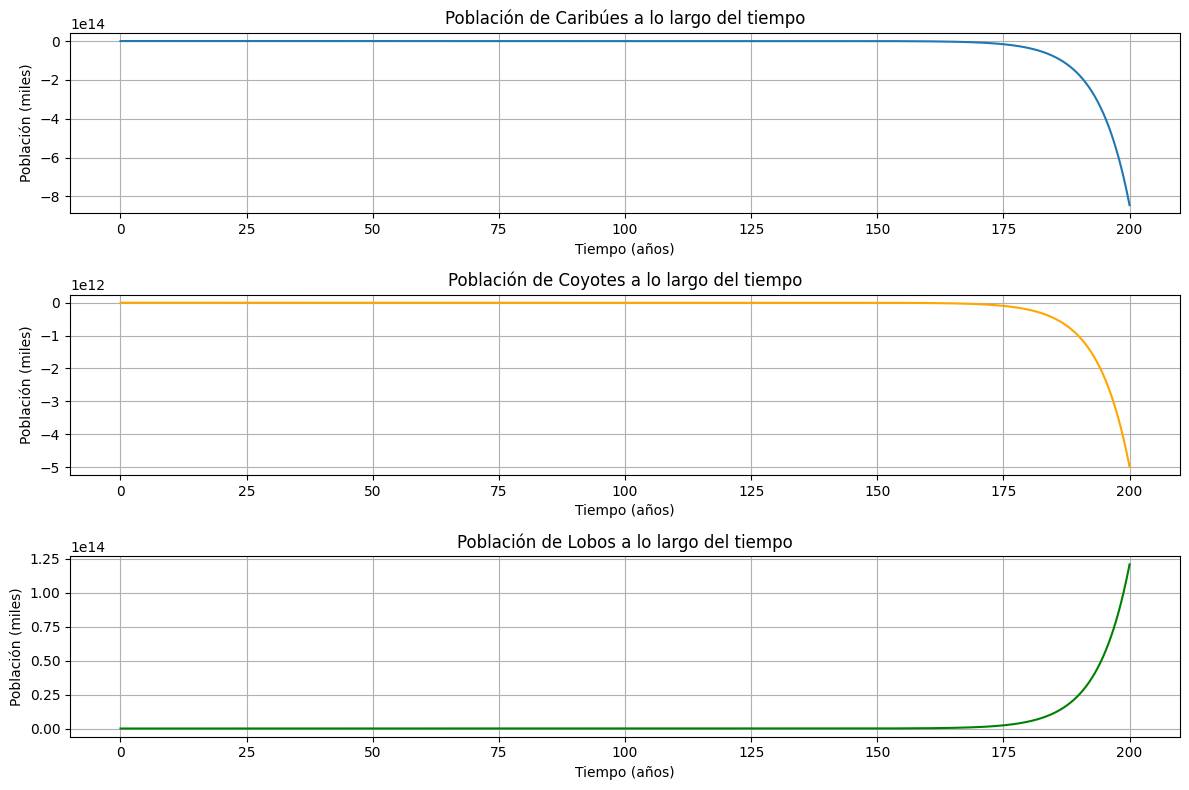

In [4]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Definir sistema de EDOs
# C, Y, L para Caribúes, Coyotes, y Lobos respectivamente

def sistema(variables, t):
    C, Y, L = variables
    dCdt = 0.0335 * C - 0.0822 * Y - 0.872 * L
    dYdt = 0.00216 * C - 0.0326 * Y + 0.00724 * L
    dLdt = 0.000154 * C + 0.124 * Y + 0.164 * L
    return [dCdt, dYdt, dLdt]

# Condiciones iniciales: [Caribúes, Coyotes, Lobos] en t = 0
condiciones_iniciales = [60.275818, 2.043051, 0.033794]

# Linspace de tiempo para integrar
linspace_temporal = np.linspace(0, 200, 2000)  # Up to 200 years, 2000 points

# Resolver sistema
solucion = odeint(sistema, condiciones_iniciales, linspace_temporal)

# Extraer los arreglos individuales de poblaciones de Caribúes, Coyotes y Lobos para graficar
caribues, coyotes, lobos = solucion.T

# Plotting the results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(linspace_temporal, caribues, label="Caribúes")
plt.xlabel("Tiempo (años)")
plt.ylabel("Población (miles)")
plt.title("Población de Caribúes a lo largo del tiempo")
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(linspace_temporal, coyotes, label="Coyotes", color='orange')
plt.xlabel("Tiempo (años)")
plt.ylabel("Población (miles)")
plt.title("Población de Coyotes a lo largo del tiempo")
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(linspace_temporal, lobos, label="Lobos", color='green')
plt.xlabel("Tiempo (años)")
plt.ylabel("Población (miles)")
plt.title("Población de Lobos a lo largo del tiempo")
plt.grid(True)

plt.tight_layout()
plt.show()
